# The 5 Graph Algorithms that we should know as a data scientist :

In this lecture, We're going to be talking about some of **the most important graph algorithms** we should know and **how to implement them using Python**.

We as data scientists have gotten quite comfortable with Pandas or SQL or any other relational database.

We are used to seeing our users in rows with their attributes as columns. But does the real world really behave like that?

**In a connected world, users cannot be considered as independent entities**. They have got **certain relationships between** each other and we would sometimes like to **include such relationships while building our machine learning models**.

Now while **in a relational database, we cannot use such relations between different rows(users)**, in a graph database it is fairly trivial to do that.

# 1. Connected Components:

![A Graph with 3 Connected Component graph](shot4.png)

We can think of **Connected Components** in very layman’s terms as a sort of a hard **clustering algorithm which finds clusters/islands in related/connected data**.

As a concrete example: 

we have data about roads joining any two cities in the world. And we need to find out all the continents in the world and which city they contain.

The **Connected Components** algorithm works based on a special case of **BFS(Breadth-First Search) or DFS(Depth-First Search)**. 

### Applications :

From a **Retail Perspective**: Let us say, we have a lot of customers using a lot of accounts. One way in which we can use the Connected components algorithm is **to find out distinct families** in our dataset.

We can assume **edges**(roads) **between CustomerIDs based on same credit card usage, or same address or same mobile number, etc**. Once we have those **connections**, we can then **run the connected component algorithm on the same to create individual clusters** to which we can then **assign a family ID**.

We can then use these family IDs **to provide personalized recommendations based on family needs**. We can also use this family ID **to fuel our classification algorithms** by creating grouped features based on family.

From a **Finance Perspective**: Another use case would be **to capture fraud using these family IDs**. If an account has done fraud in the past, it is highly probable that the connected accounts are also susceptible to fraud.

The possibilities are only limited by your own imagination.

### Code :

Let us start with an example graph which we are using for our purpose. Contains cities and distance information between them.

![a graph with some random distances](Capture1.png)

We will be using the Networkx module in Python for creating and analyzing our graphs.

In [1]:
# for doing some basic operations
import numpy as np
import pandas as pd

# to do some basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# to do some network visualizations
import networkx as nx

# to ignore some warnings
import warnings
warnings.filterwarnings('ignore')

We first start by creating a list of edges along with the distances which we will add as the weight of the edge:

In [2]:
edgelist = [['Mannheim', 'Frankfurt', 85],
            ['Mannheim', 'Karlsruhe', 80],
            ['Erfurt', 'Wurzburg', 186],
            ['Munchen', 'Numberg', 167],
            ['Munchen', 'Augsburg', 84],
            ['Munchen', 'Kassel', 502],
            ['Numberg', 'Stuttgart', 183],
            ['Numberg', 'Wurzburg', 103],
            ['Numberg', 'Munchen', 167],
            ['Stuttgart', 'Numberg', 183],
            ['Augsburg', 'Munchen', 84],
            ['Augsburg', 'Karlsruhe', 250],
            ['Kassel', 'Munchen', 502],
            ['Kassel', 'Frankfurt', 173],
            ['Frankfurt', 'Mannheim', 85],
            ['Frankfurt', 'Wurzburg', 217],
            ['Frankfurt', 'Kassel', 173],
            ['Wurzburg', 'Numberg', 103],
            ['Wurzburg', 'Erfurt', 186],
            ['Wurzburg', 'Frankfurt', 217],
            ['Karlsruhe', 'Mannheim', 80],
            ['Karlsruhe', 'Augsburg', 250],
            ["Mumbai", "Dehli",400],
            ['Dehli', 'Mumbai', 400],
            ["Dehli", "Kolkata",500],
            ['Kolkata', 'Dehli', 500],
            ["Kolkata", "Bangalore",600],
            ['Bangalore', 'Kolkata', 600],
            ["TX", "NY",1200],
            ["ALB", "NY",800]]

Let us **create a graph** using **.Graph() Class embeded in the Networkx library**, then we want **to create some connections between nodes** by traversing edge list.



In [3]:
graph = nx.Graph()
for edge in edgelist:
    graph.add_edge(u_of_edge= edge[0], v_of_edge= edge[1], weight= edge[2])
graph

**to visualize a network**, we should use **nx.draw_networkx()**.

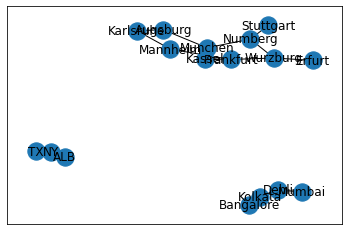

In [4]:
nx.draw_networkx(graph)

**to fix this problem**, we should determine **the distance between nodes** by using **matplotlib.pyplot** library.

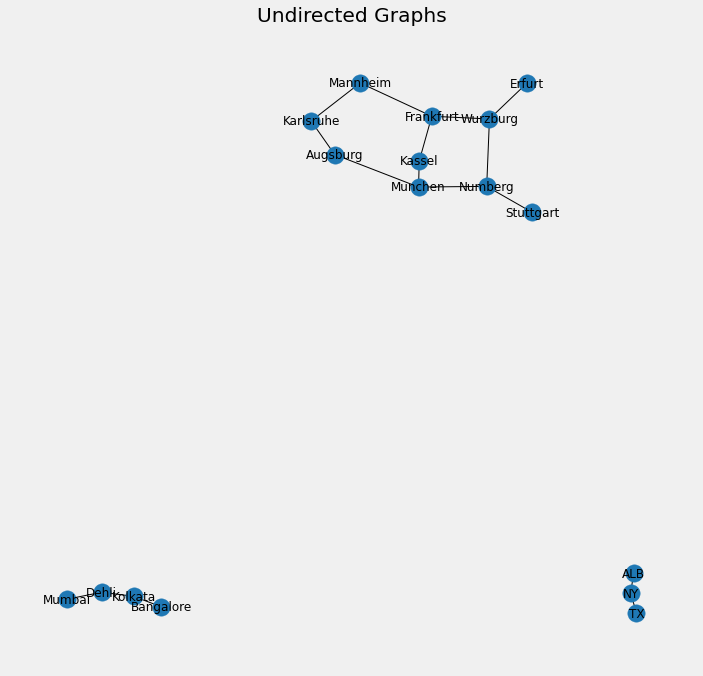

In [5]:
# to set a size for a figure
plt.rcParams['figure.figsize'] = (11, 11)

# to set a style for a axis for instance the checkered style
plt.style.use('fivethirtyeight') 

pos= nx.spring_layout(G= graph)

# drawing network (or graph)
nx.draw_networkx(G= graph, pos= pos)

# to set a title for the axes 
plt.title('Undirected Graphs')

# to turn off the axis boards
plt.axis('off')

plt.show()

Now we want to find out distinct continents and their cities from this graph.

We can now do this using the connected components algorithm as:

In [6]:
for i, x in enumerate(nx.connected_components(graph)):
    print('CC'+str(i)+' :', x)

CC0 : {'Mannheim', 'Wurzburg', 'Augsburg', 'Frankfurt', 'Stuttgart', 'Munchen', 'Erfurt', 'Kassel', 'Karlsruhe', 'Numberg'}
CC1 : {'Bangalore', 'Dehli', 'Kolkata', 'Mumbai'}
CC2 : {'ALB', 'NY', 'TX'}


As you can see we are able to find distinct components in our data. Just by using Edges and Vertices. This algorithm could be run on different data to satisfy any use case that I presented above.

# 2. Shortest path :

![](Shot5.jpg)

Continuing with the above example only, we are given a graph with the cities of Germany and the respective distance between them.

You want to find out how to go from Frankfurt (The starting node) to Munchen by covering the shortest distance.

The algorithm that we use for this problem is called Dijkstra. In Dijkstra’s own words:

"What is the shortest way to travel from Rotterdam to Groningen, in general: from given city to given city. It is the algorithm for the shortest path, which I designed in about twenty minutes. One morning I was shopping in Amsterdam with my young fiancée, and tired, we sat down on the café terrace to drink a cup of coffee and I was just thinking about whether I could do this, and I then designed the algorithm for the shortest path. As I said, it was a twenty-minute invention. In fact, it was published in ’59, three years later. The publication is still readable, it is, in fact, quite nice. One of the reasons that it is so nice was that I designed it without pencil and paper. I learned later that one of the advantages of designing without pencil and paper is that you are almost forced to avoid all avoidable complexities. Eventually that algorithm became, to my great amazement, one of the cornerstones of my fame."

— Edsger Dijkstra, in an interview with Philip L. Frana, Communications of the ACM, 2001[3]

### Applications :

* Variations of the Dijkstra algorithm is used extensively in Google Maps to find the shortest routes.
* You are in a Walmart Store. You have different Aisles and distance between all the aisles. You want to provide the shortest pathway to the customer from Aisle A to Aisle D.

![](capture2.png)

* You have seen how LinkedIn shows up 1st-degree connections, 2nd-degree connections. What goes on behind the scenes?

![](Shot6.png)

### code:

In [7]:
print(nx.shortest_path(graph, 'Stuttgart', 'Frankfurt',
                        weight= 'weight'))
print(nx.shortest_path_length(graph, 'Stuttgart', 'Frankfurt',
                             weight= 'weight'))

['Stuttgart', 'Numberg', 'Wurzburg', 'Frankfurt']
503


We can also find **Shortest paths between all pairs** using **nx.all_pairs_dijkstra_path()**.

In [8]:
for x in nx.all_pairs_dijkstra_path(G= graph, weight= 'weight'):
    print(x)
    

('Mannheim', {'Mannheim': ['Mannheim'], 'Frankfurt': ['Mannheim', 'Frankfurt'], 'Karlsruhe': ['Mannheim', 'Karlsruhe'], 'Augsburg': ['Mannheim', 'Karlsruhe', 'Augsburg'], 'Kassel': ['Mannheim', 'Frankfurt', 'Kassel'], 'Wurzburg': ['Mannheim', 'Frankfurt', 'Wurzburg'], 'Munchen': ['Mannheim', 'Karlsruhe', 'Augsburg', 'Munchen'], 'Erfurt': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg', 'Stuttgart']})
('Frankfurt', {'Frankfurt': ['Frankfurt'], 'Mannheim': ['Frankfurt', 'Mannheim'], 'Kassel': ['Frankfurt', 'Kassel'], 'Wurzburg': ['Frankfurt', 'Wurzburg'], 'Karlsruhe': ['Frankfurt', 'Mannheim', 'Karlsruhe'], 'Augsburg': ['Frankfurt', 'Mannheim', 'Karlsruhe', 'Augsburg'], 'Munchen': ['Frankfurt', 'Wurzburg', 'Numberg', 'Munchen'], 'Erfurt': ['Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Frankfurt', 'Wurzburg', 'Numb

we can also find **the shortest path lenght between all pairs** using **nx.all_pairs_dijkstra_path_length()**.

In [9]:
for x in nx.all_pairs_dijkstra_path_length(G= graph, weight= 'weight'):
    print(x)

('Mannheim', {'Mannheim': 0, 'Karlsruhe': 80, 'Frankfurt': 85, 'Kassel': 258, 'Wurzburg': 302, 'Augsburg': 330, 'Numberg': 405, 'Munchen': 414, 'Erfurt': 488, 'Stuttgart': 588})
('Frankfurt', {'Frankfurt': 0, 'Mannheim': 85, 'Karlsruhe': 165, 'Kassel': 173, 'Wurzburg': 217, 'Numberg': 320, 'Erfurt': 403, 'Augsburg': 415, 'Munchen': 487, 'Stuttgart': 503})
('Karlsruhe', {'Karlsruhe': 0, 'Mannheim': 80, 'Frankfurt': 165, 'Augsburg': 250, 'Munchen': 334, 'Kassel': 338, 'Wurzburg': 382, 'Numberg': 485, 'Erfurt': 568, 'Stuttgart': 668})
('Erfurt', {'Erfurt': 0, 'Wurzburg': 186, 'Numberg': 289, 'Frankfurt': 403, 'Munchen': 456, 'Stuttgart': 472, 'Mannheim': 488, 'Augsburg': 540, 'Karlsruhe': 568, 'Kassel': 576})
('Wurzburg', {'Wurzburg': 0, 'Numberg': 103, 'Erfurt': 186, 'Frankfurt': 217, 'Munchen': 270, 'Stuttgart': 286, 'Mannheim': 302, 'Augsburg': 354, 'Karlsruhe': 382, 'Kassel': 390})
('Munchen', {'Munchen': 0, 'Augsburg': 84, 'Numberg': 167, 'Wurzburg': 270, 'Karlsruhe': 334, 'Stuttgart

# 3.Minimum Spannig Tree :

![](Shot7.jpg)

Now we have another problem. We work for a water pipe laying company or an internet fiber company. We need to connect all the cities in the graph we have using the minimum amount of wire/pipe. How do we do this?

![An Undirected Graph and its MST on the right.](Shot8.png)

### Applications :

* Minimum spanning trees have direct applications in the design of networks, including computer networks, telecommunications networks, transportation networks, water supply networks, and electrical grids (which they were first invented for)
* MST is used for approximating the traveling salesman problem
* Clustering — First construct MST and then determine a threshold value for breaking some edges in the MST using Intercluster distances and Intracluster distances.
* Image Segmentation — It was used for Image segmentation where we first construct an MST on a graph where pixels are nodes and distances between pixels are based on some similarity measure(color, intensity, etc.)

### code :

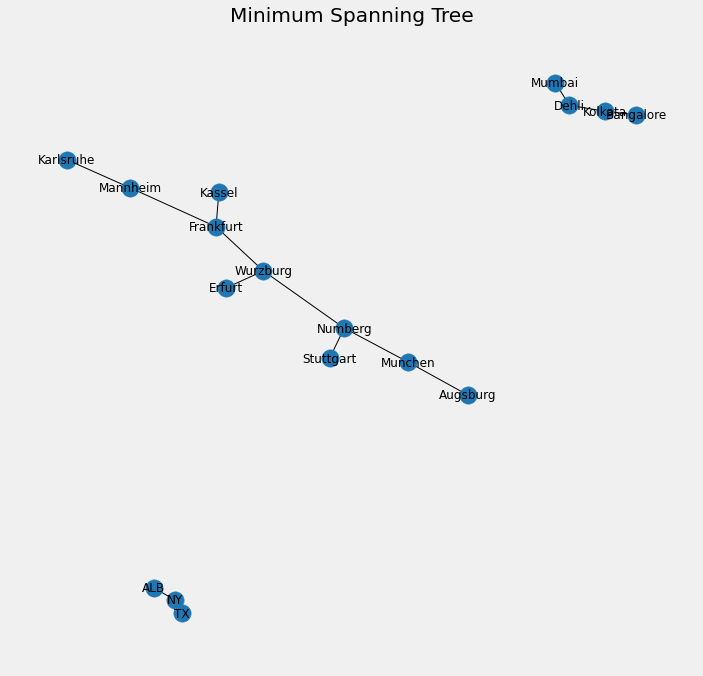

In [10]:
plt.title('Minimum Spanning Tree')
nx.draw_networkx(G= nx.minimum_spanning_tree(G= graph))
plt.style.use(style= 'fivethirtyeight')
plt.axis('off')
plt.show()

# Pagerank :

![](Shot9.jpg)

This is the page sorting algorithm that powered google for a long time. It assigns scores to pages based on the number and quality of incoming and outgoing links.

### Applications :

Pagerank can be used anywhere where we want to estimate node importance in any network.

* It has been used for finding the most influential papers using citations.
* Has been used by Google to rank pages.
* It can be used to rank tweets- User and Tweets as nodes. Create Link between user if user A follows user B and Link between user and Tweets if user tweets/retweets a tweet.
* Recommendation engines.

### code :

For this exercise, we are going to be using Facebook data. We have a file of edges/links between facebook users. We first create the FB graph using:

In [11]:
import os
print(os.listdir('F:/Courses/Coursera/intoduction to data science in python/training.JN/week 4'))

['.ipynb_checkpoints', '4.1.BasicStatisticalTesting.ipynb', '4.2.the_forms_of_structured_data.ipynb', '4.3.The5GraphThatWeShouldKnow.ipynb', '4.4.FinalQuiz.ipynb', '4.5.FinalExercise.ipynb', 'Capture1.PNG', 'Capture2.PNG', 'datasets', 'Shot1.png', 'Shot2.png', 'Shot3.png', 'Shot4.png', 'Shot5.jpg', 'Shot6.png', 'Shot7.jpg', 'Shot8.png', 'Shot9.jpg']


to read **a dataset including the information of a network (or graph)**, we should use **nx.read_edgelist() built-in function**.

In [12]:
fbG = nx.read_edgelist(path= 'F:/Courses/Coursera/intoduction to data science in python/training.JN/week 4/datasets/facebook-combined.txt',
                         create_using= nx.Graph(), nodetype= int)
print(nx.info(G= fbG))

Graph with 3959 nodes and 84243 edges


In [ ]:
pos = nx.spring_layout(G= fbG)
nx.draw_networkx(fbG, pos, with_labels= False, node_size= 35)

plt.rcParams['figure.figsize'] = (20, 20)
plt.style.use('fivethirtyeight')
plt.axis('off')
plt.title('FB User Graph')
plt.show()

Now we want to find the **users having high influence capability**.

Intuitively, the Pagerank algorithm will give **a higher score to a user who has a lot of friends** who in turn have a lot of FB Friends.

In [14]:
print(nx.pagerank(G= fbG))

{236: 0.0004027335077713568, 186: 0.00045841027608496844, 122: 0.0006583530605460556, 285: 0.0005090717031199382, 24: 0.0002166496571972657, 346: 0.0003554045173795467, 271: 0.000741082250571092, 304: 0.0005718369216881564, 176: 0.00016440973923707774, 9: 0.0005951186169770776, 130: 0.00022581380040648464, 329: 0.00041757589496968376, 204: 0.00028833486803640253, 213: 0.0004424314012934176, 252: 0.0006659517516172068, 332: 0.0004747855984722754, 82: 0.0003768283869757571, 65: 0.00014738472947502384, 276: 0.00020222398863861083, 26: 0.0006871409321492672, 280: 0.0004943116294975166, 272: 0.0004971343797290026, 211: 0.0003184396910876557, 199: 0.0004919660603508409, 84: 0.00018850080026318558, 133: 0.0002397965981560319, 62: 0.0002843395778598106, 239: 0.0006318113245748384, 172: 0.0004318536497658858, 322: 0.0007955678183009374, 53: 0.0004169383655038066, 3: 0.00022336711537103987, 170: 0.0005177426983249756, 175: 0.0004882885529796974, 46: 0.00014807670502753646, 56: 0.0008035695177707

In [15]:
import operator 

We can get **the sorted PageRank** or **most influential users** using:



In [16]:
sorted_pagerank = sorted(nx.pagerank(fbG).items(),
                        key= operator.itemgetter(1), reverse= True)
print(sorted_pagerank)

[(483, 0.0013599133699007313), (3830, 0.0013447129836372254), (2313, 0.0009589781687839365), (376, 0.0009407023103604414), (2047, 0.0009130312315135463), (25, 0.0008304997705713236), (428, 0.0008243125587704727), (828, 0.0008225679328783264), (475, 0.0008138458156175798), (56, 0.0008035695177707603), (713, 0.0008004654101467428), (563, 0.0007962713502904459), (322, 0.0007955678183009374), (3596, 0.0007949357034193671), (917, 0.000782312793673376), (119, 0.0007789660623617489), (67, 0.000769156619389367), (3938, 0.0007516860513185366), (3545, 0.0007501788729766728), (271, 0.000741082250571092), (277, 0.00073474114831257), (3604, 0.0007297281072696948), (3918, 0.0007246848376345669), (3521, 0.0007167615744546168), (2951, 0.0007165083564460054), (1888, 0.0007139867594846759), (705, 0.0007091955584380811), (1800, 0.0007016685520003218), (3101, 0.0006990632389889725), (637, 0.0006940187495770334), (3291, 0.0006932710003326875), (412, 0.0006925249491098432), (1783, 0.0006913325901728565), (2

we sorted pagerank algorithm items **descendingly** and **based on the returning value** not key.

**The above IDs(keys) are for the influential users(nodes)**.

the information about the most infulential user in the fbG is :

In [17]:
sorted_pagerank[0]

(483, 0.0013599133699007313)

**.neighbors()** Returns **an iterator over all neighbors(nodes) of node n**.

In [18]:
fbG.neighbors(n= 483)

In [19]:
num_neighbors = 0
for key in fbG.neighbors(n= 483):
    print(key)
    num_neighbors += 1


1374
641
930
538
1237
1155
1179
484
1142
1595
1261
1850
1875
1492
1801
1766
596
1392
984
1490
1373
1844
1281
1408
1148
1828
1742
1086
1893
1870
1282
1515
1018
563
1794
1192
1210
420
366
954
1425
1473
1358
1099
1204
1543
1744
1645
1881
1475
1303
1720
1102
651
936
1080
1848
1332
1899
948
1487
637
1616
517
1012
1695
1400
1166
1694
1382
1894
1682
1514
1495
1692
1536
1032
896
1277
1508
1631
1661
1706
1606
580
1545
933
1349
1313
1820
376
1790
1014
1158
1812
1122
1654
1455
1783
917
1114
1025
1357
1732
1309
1680
1429
1406
1095
1660
1878
1824
1871
526
1767
1320
1324
1773
1294
1677
1882
1245
1273
475
1679
566
962
1284
919
1512
1464
1104
1318
1446
1740
1001
1625
1751
976
348
1582
1611
942
1565
1638
363
1113
1396
1763
1108
1574
1020
1397
1673
414
606
1300
1427
353
1786
1066
601
1778
1729
1454
1907
544
422
367
417
370
463
479
559
503
419
397
515
404
493
496
482
500
513
446
461
524
438
506
561
430
416
412
408
514
492
373
432
465
391
553
507
520
560
392
537
378
385
527
542
388
431
395
567
444
557
473

there are **231 neighbors(nodes) and edges** around the node 483.

In [23]:
num_neighbors

231

We can draw a **subgraph** for **the most influential user** in the fbG:

now, we know the most influential user in the fbG has the id 483 .

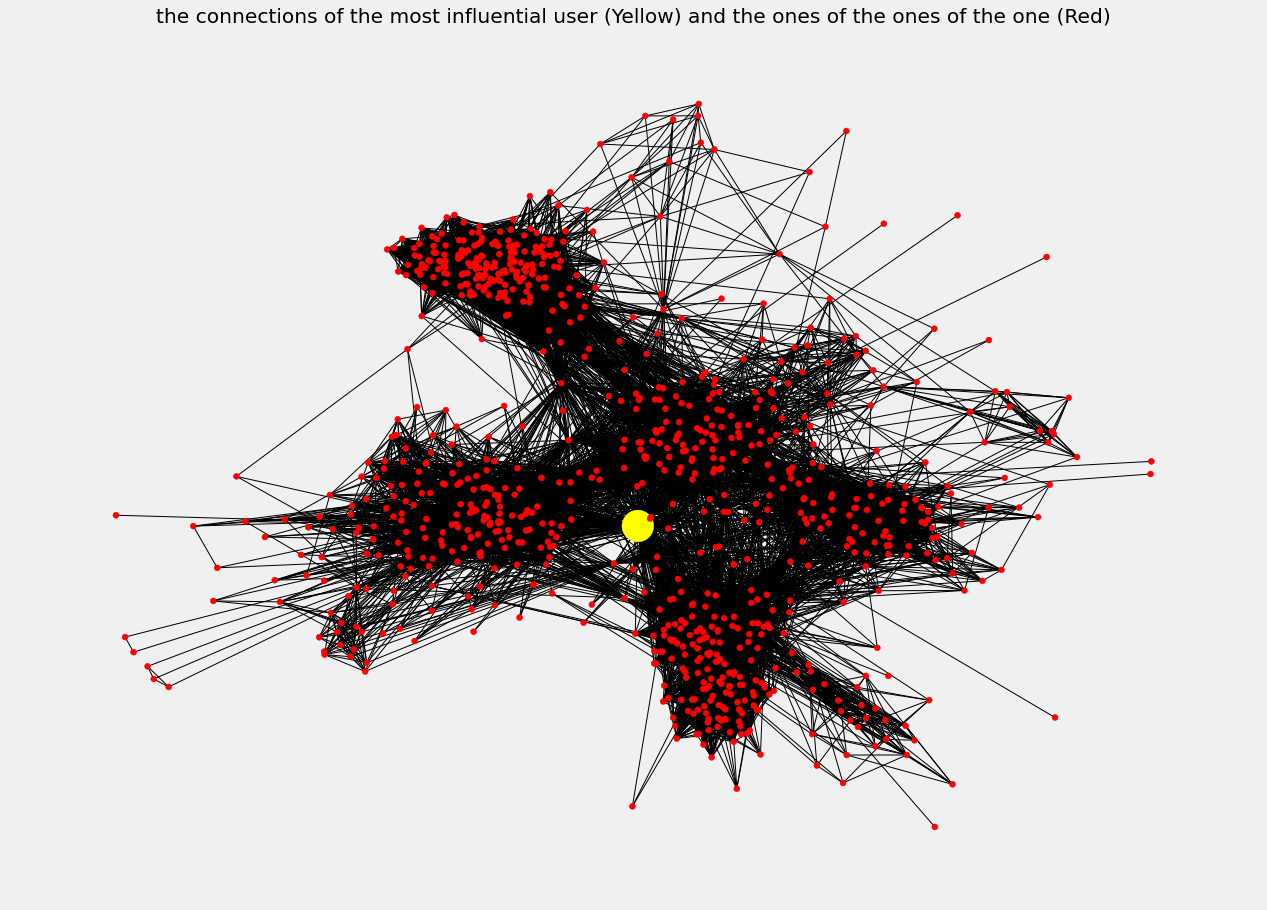

In [24]:
first_degree_connected_nodes = list(nx.neighbors(G= fbG, n= 483))
second_degree_connected_nodes = []

for node in first_degree_connected_nodes:
    second_degree_connected_nodes += list(fbG.neighbors(n= node))

second_degree_connected_nodes.remove(483)
second_degree_connected_nodes = list(set(second_degree_connected_nodes))

# Returns the subgraph induced on nodes in nbunch.
subgraph_483 = nx.subgraph(G= fbG, nbunch= first_degree_connected_nodes + second_degree_connected_nodes)

pos= nx.spring_layout(G= subgraph_483)
node_color = ['yellow' if vID == 483 else 'red' for vID in subgraph_483]
node_size = [1000 if vID == 483 else 35 for vID in subgraph_483]
nx.draw_networkx(subgraph_483, pos, with_labels= False,
                node_color= node_color, node_size= node_size)

plt.style.use(style= 'fivethirtyeight')
plt.title('the connections of the most influential user (Yellow) and the ones of the ones of the one (Red)')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
plt.show()

# 5.Centrality Measures :

There are a lot of centrality measures which you can use as features to your machine learning models. I will talk about two of them. You can look at other measures here.

Betweenness Centrality: It is not only the users who have the most friends that are important, the users who connect one geography to another are also important as that lets users see content from diverse geographies. Betweenness centrality quantifies how many times a particular node comes in the shortest chosen path between two other nodes.

Degree Centrality: It is simply the number of connections for a node.

### Applications :

Centrality measures can be used as a feature in any machine learning model.

### Code :

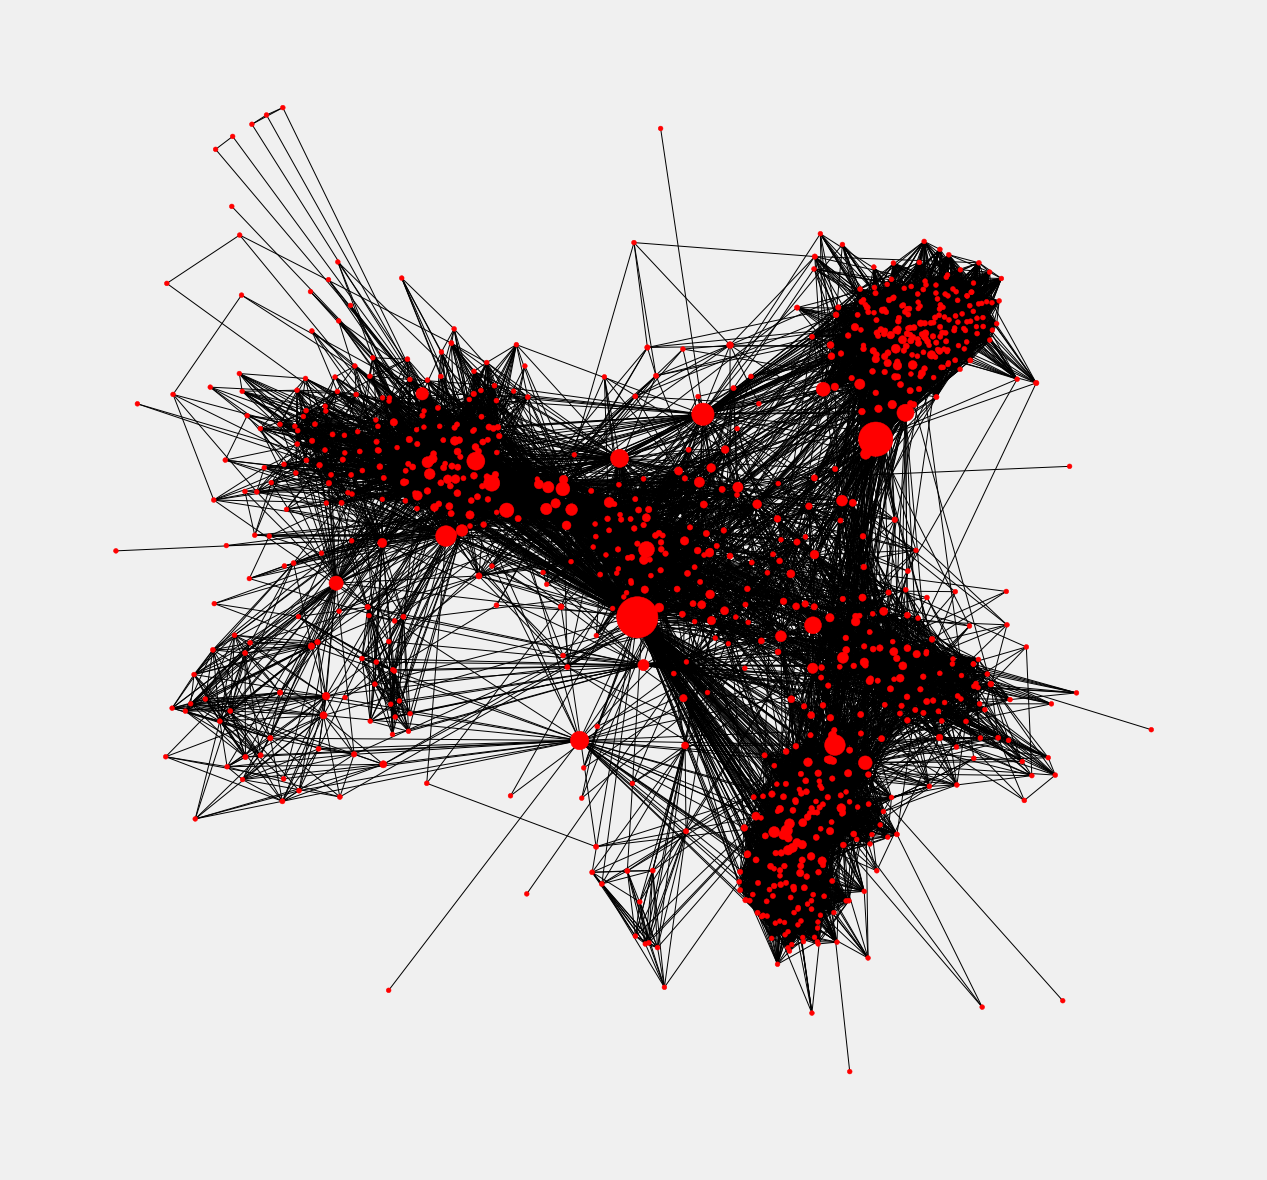

In [25]:
betweennessCentrality = nx.betweenness_centrality(G= subgraph_483,
                             normalized= True, endpoints= True)

pos= nx.spring_layout(subgraph_483)
node_size = [vID * 10000 for vID in betweennessCentrality.values()]
node_color = ['red' for vID in betweennessCentrality.values()]

plt.figure(figsize=(20,20))
plt.axis('off')
nx.draw_networkx(subgraph_483, pos, with_labels= False,
                node_size= node_size, node_color= node_color)
plt.show()

### Conclusion :

In this post, I talked about some of the most influential graph algorithms that have changed the way we live.

With the advent of so much social data, network analysis could help a lot in improving our models and generating value.

And even understanding a little more about the world.

There are a lot of graph algorithms out there, but these are the ones I like the most. Do look into the algorithms in more detail if you like. In this post, I just wanted to get the required breadth into the area.